In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data =pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data['Cabin'].fillna('Not Available', inplace=True)

# Embarked only has 2 missing values, so replacing the NaN with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Available,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Available,S


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [10]:
data =data.dropna(axis=0)

In [13]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
data['Name'].value_counts()

Braund, Mr. Owen Harris                            1
Kimball, Mr. Edwin Nelson Jr                       1
Chapman, Mr. John Henry                            1
Van Impe, Mr. Jean Baptiste                        1
Johnson, Mr. Alfred                                1
                                                  ..
Allison, Miss. Helen Loraine                       1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
Johnson, Mr. William Cahoone Jr                    1
Allison, Master. Hudson Trevor                     1
Dooley, Mr. Patrick                                1
Name: Name, Length: 714, dtype: int64

In [15]:
data['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64

In [16]:
data['Ticket'].value_counts()

347082     7
3101295    6
CA 2144    6
347088     6
382652     5
          ..
250651     1
2693       1
349233     1
349236     1
370376     1
Name: Ticket, Length: 542, dtype: int64

In [17]:
data['Cabin'].value_counts()

Not Available    529
C23 C25 C27        4
B96 B98            4
G6                 4
F2                 3
                ... 
C91                1
C124               1
C32                1
E34                1
C148               1
Name: Cabin, Length: 135, dtype: int64

In [18]:
data['Embarked'].value_counts()

S    556
C    130
Q     28
Name: Embarked, dtype: int64

In [19]:
le =LabelEncoder()
data["Name"]=le.fit_transform(data["Name"])
data["Ticket"]=le.fit_transform(data["Ticket"])
data["Cabin"]=le.fit_transform(data["Cabin"])

In [20]:
data.replace({"male":0, "female":1},inplace =True)
data.replace({"S":0, "C":1, "Q":2},inplace =True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,103,0,22.0,1,0,408,7.2500,133,0
1,2,1,1,179,1,38.0,1,0,471,71.2833,73,1
2,3,1,3,317,1,26.0,0,0,532,7.9250,133,0
3,4,1,1,247,1,35.0,1,0,40,53.1000,49,0
4,5,0,3,15,0,35.0,0,0,373,8.0500,133,0


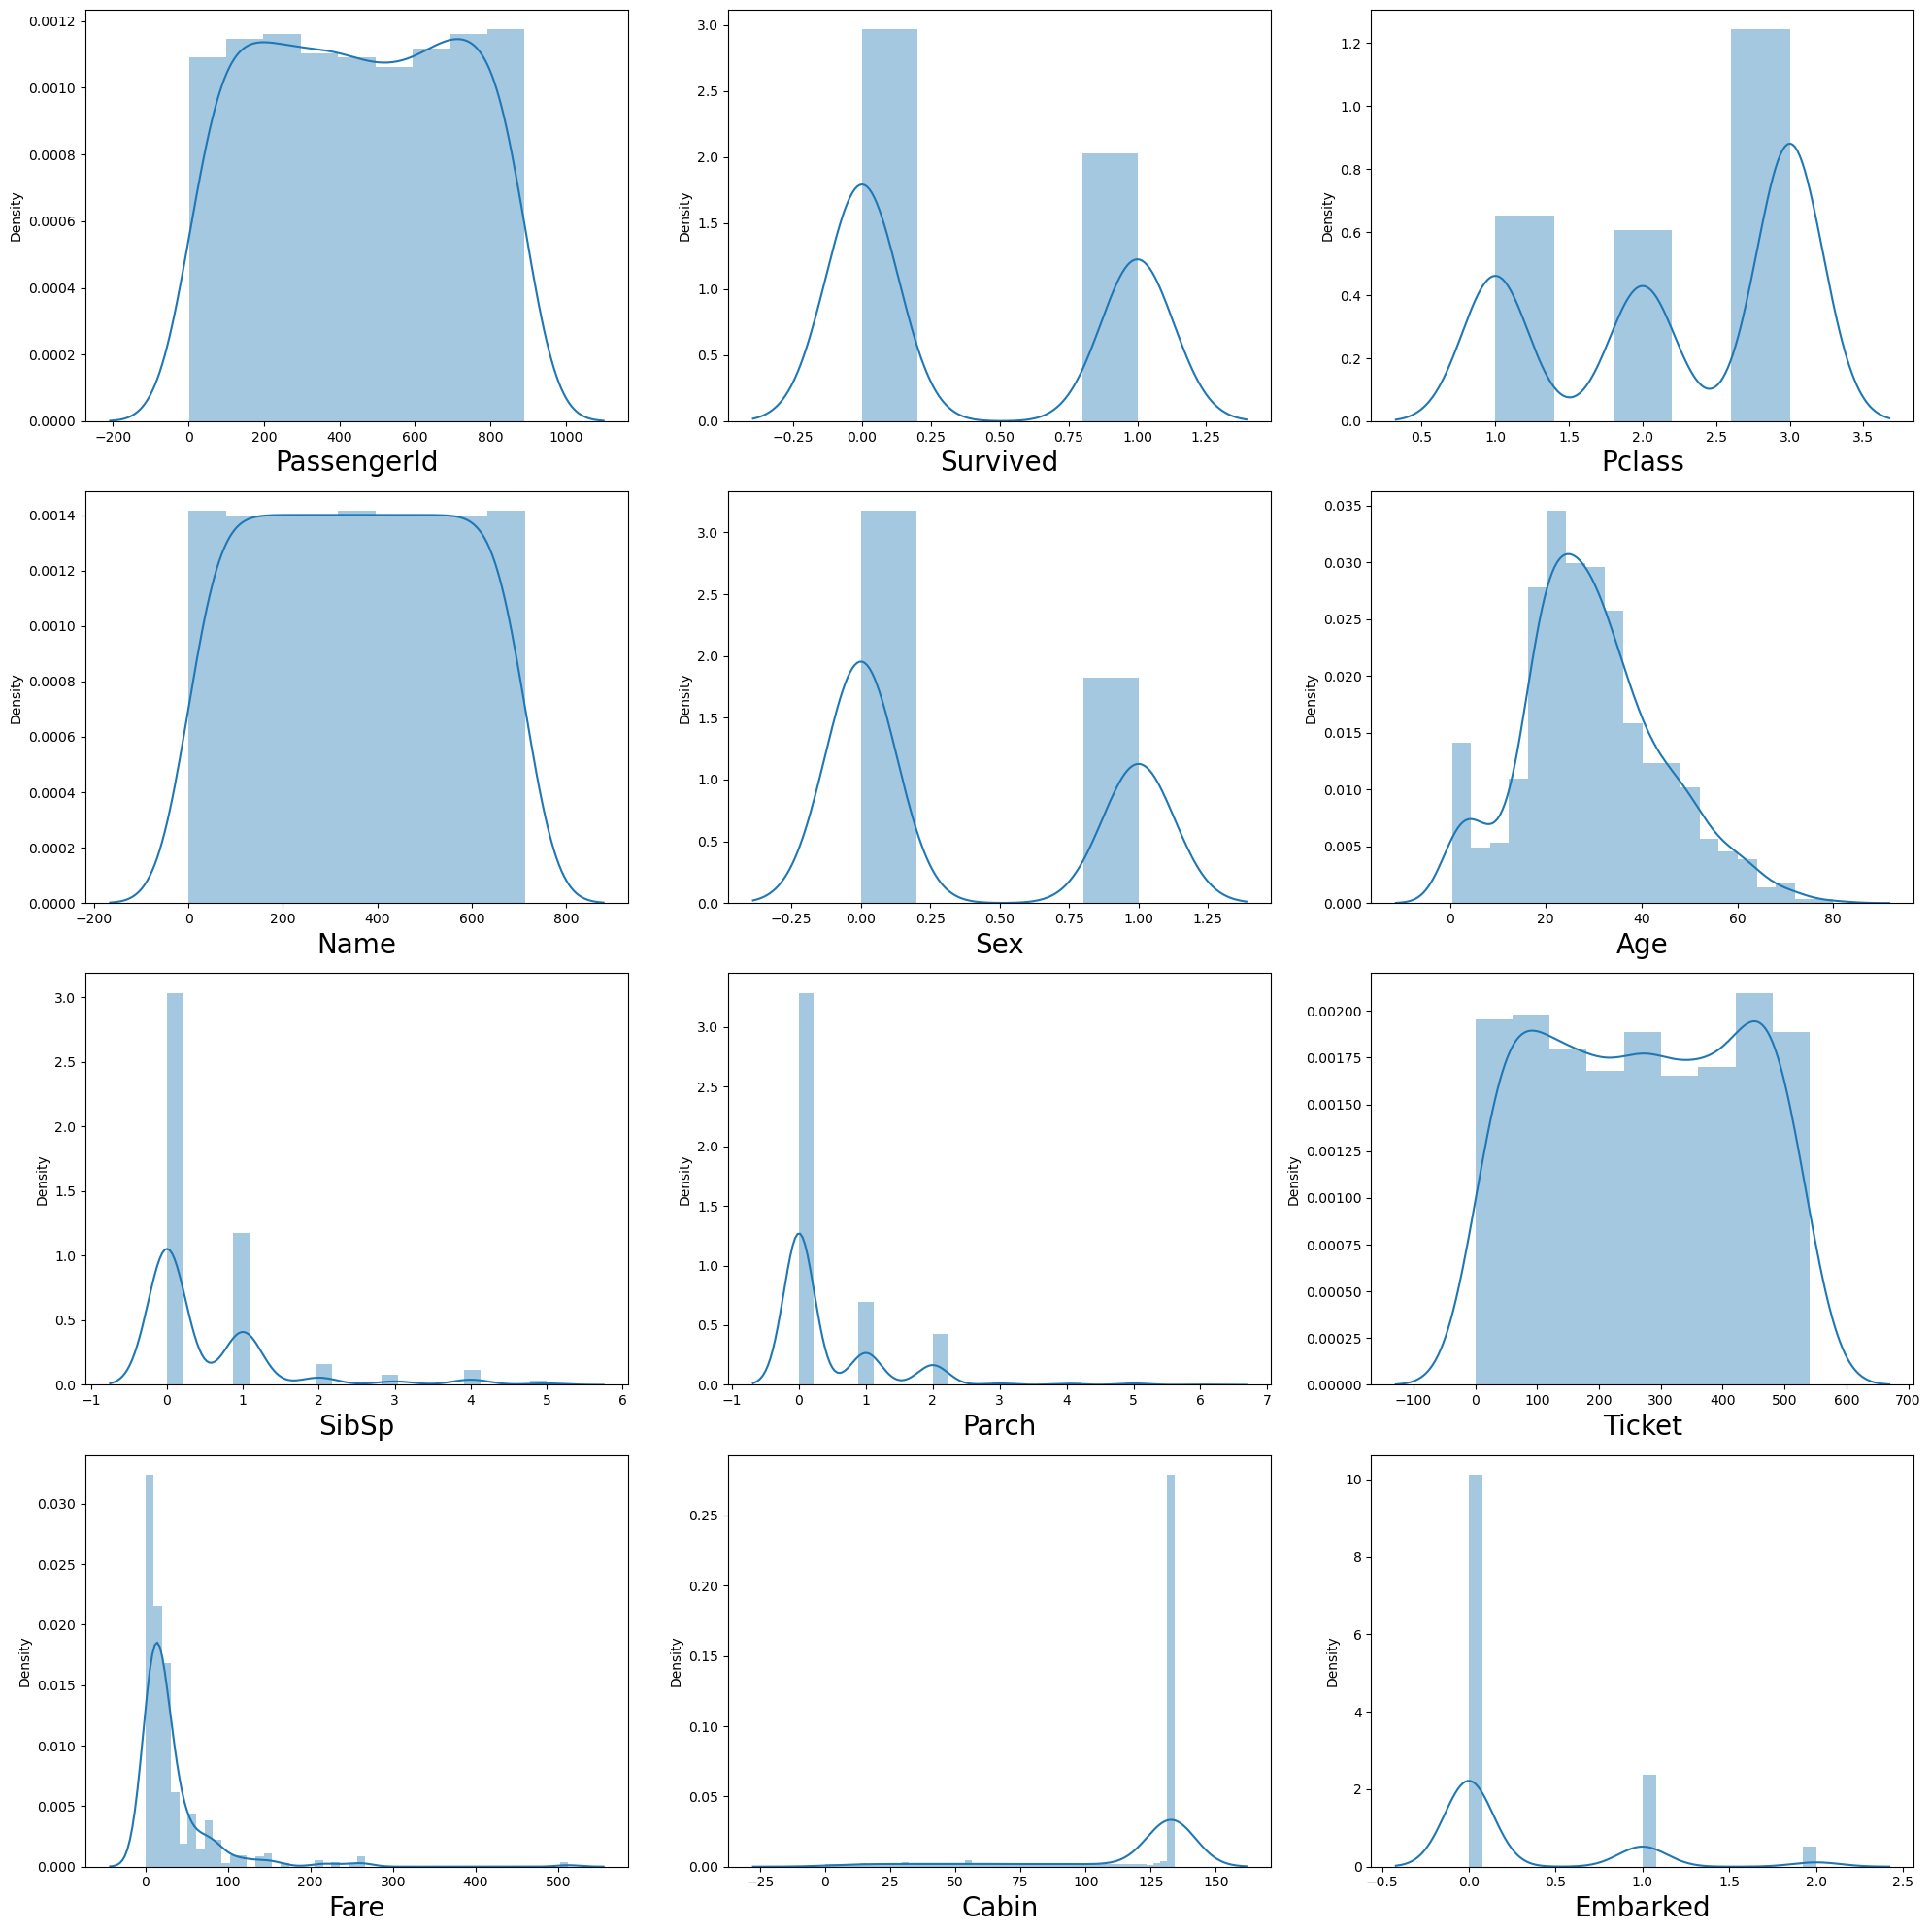

In [22]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

In [23]:
x =data.drop(['Survived'], axis =1)
y =data['Survived']

In [24]:
x.skew().sort_values(ascending=False)

Fare           4.653630
Parch          2.618914
SibSp          2.519577
Embarked       1.890649
Sex            0.559559
Age            0.389108
Name           0.000000
PassengerId   -0.000609
Ticket        -0.000990
Pclass        -0.468543
Cabin         -1.974593
dtype: float64

In [25]:
x_new =power_transform(x)
x = pd.DataFrame(x_new, columns= x.columns)
x.skew().sort_values(ascending=False)

Embarked       1.345934
Parch          1.043926
SibSp          0.705879
Sex            0.559559
Age           -0.027055
Fare          -0.051554
PassengerId   -0.284058
Name          -0.287506
Ticket        -0.298696
Pclass        -0.326316
Cabin         -1.464486
dtype: float64

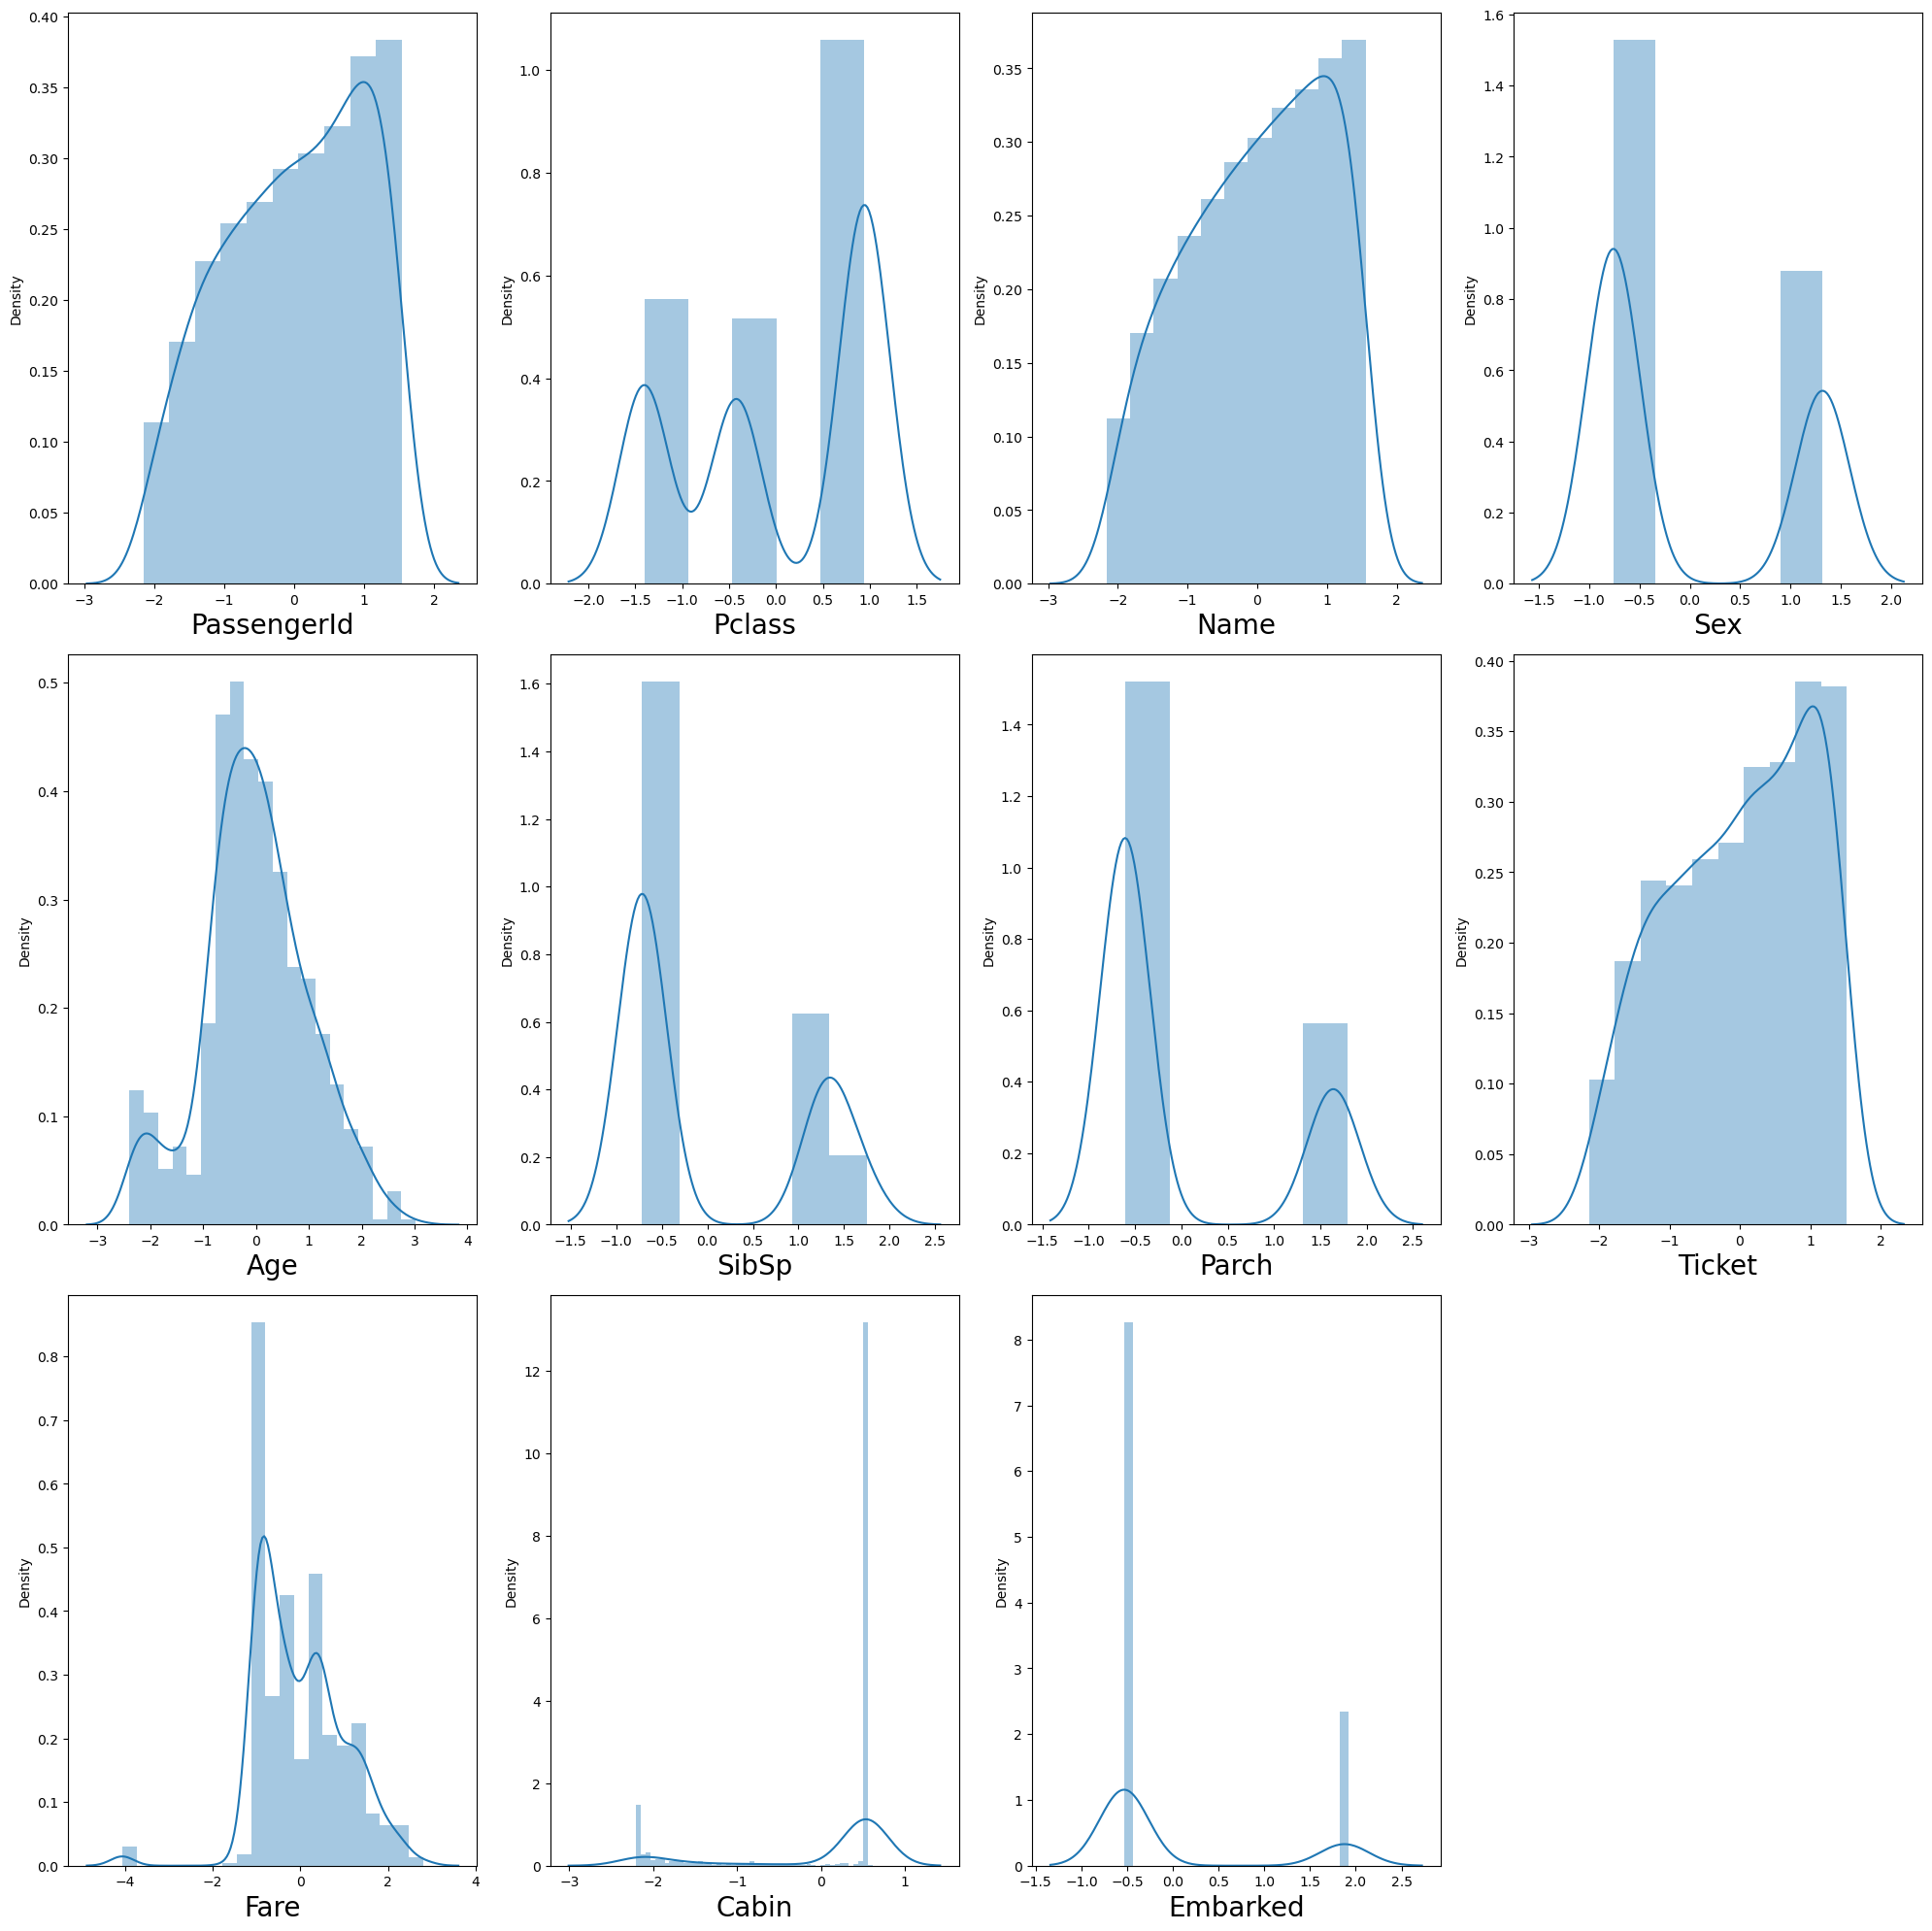

In [26]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

In [27]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-2.15529432,  0.94266326, -1.24052812, ..., -1.00019823,
         0.53641302, -0.53305749],
       [-2.13871326, -1.40582968, -0.78577803, ...,  1.28253549,
        -1.87372228,  1.86706785],
       [-2.12370348,  0.94266326, -0.08391432, ..., -0.90385145,
         0.53641302, -0.53305749],
       ...,
       [ 1.52906431, -1.40582968, -0.29086123, ...,  0.47932276,
        -2.19227946, -0.53305749],
       [ 1.535009  , -1.40582968, -1.3958028 , ...,  0.47932276,
        -2.09505944,  1.86706785],
       [ 1.53797988,  0.94266326, -0.64406197, ..., -0.9280049 ,
         0.53641302,  1.91646936]])

In [28]:
x.shape

(714, 11)

In [29]:
y.shape

(714,)

In [30]:
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size= 0.25, random_state =i)
    rfc =RandomForestClassifier()
    rfc.fit(x_train,y_train)
    y_pred =rfc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy', maxAccu, 'random state',i)

accuracy 0.8603351955307262 random state 1
accuracy 0.8603351955307262 random state 1
accuracy 0.8268156424581006 random state 2
accuracy 0.8156424581005587 random state 3
accuracy 0.8044692737430168 random state 4
accuracy 0.7877094972067039 random state 5
accuracy 0.7988826815642458 random state 6
accuracy 0.7821229050279329 random state 7
accuracy 0.8156424581005587 random state 8
accuracy 0.7932960893854749 random state 9
accuracy 0.8324022346368715 random state 10
accuracy 0.776536312849162 random state 11
accuracy 0.8100558659217877 random state 12
accuracy 0.8268156424581006 random state 13
accuracy 0.8268156424581006 random state 14
accuracy 0.7932960893854749 random state 15
accuracy 0.8212290502793296 random state 16
accuracy 0.8156424581005587 random state 17
accuracy 0.7821229050279329 random state 18
accuracy 0.7877094972067039 random state 19
accuracy 0.8212290502793296 random state 20
accuracy 0.8100558659217877 random state 21
accuracy 0.7932960893854749 random state 22

In [31]:
x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size= 0.25, random_state =41)

In [32]:
lr =LogisticRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)

In [34]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.7932960893854749

 Confusion Matrix : [[95 16]
 [21 47]]

               precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.75      0.69      0.72        68

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [35]:
scr = cross_val_score(lr,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.78854556803995


In [36]:
# Random Forest Classifier
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred =rf.predict(x_test)

In [37]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.8491620111731844

 Confusion Matrix : [[102   9]
 [ 18  50]]

               precision    recall  f1-score   support

           0       0.85      0.92      0.88       111
           1       0.85      0.74      0.79        68

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [38]:
scr = cross_val_score(rf,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8152777777777778


In [39]:
# Decision Tree Classifier
dtc =DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred =dtc.predict(x_test)

In [40]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.776536312849162

 Confusion Matrix : [[87 24]
 [16 52]]

               precision    recall  f1-score   support

           0       0.84      0.78      0.81       111
           1       0.68      0.76      0.72        68

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [41]:
scr = cross_val_score(dtc,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.7409488139825218


In [42]:
# KNN Classifier
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred =knn.predict(x_test)

In [43]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.7877094972067039

 Confusion Matrix : [[93 18]
 [20 48]]

               precision    recall  f1-score   support

           0       0.82      0.84      0.83       111
           1       0.73      0.71      0.72        68

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [44]:
scr = cross_val_score(knn,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.7717072409488139


# Hyperparameter Tuning

In [96]:
rfc = RandomForestClassifier()

In [132]:
params ={'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[8,15],
          'min_samples_split':[2,11],
           'min_samples_leaf':[2,10]}

In [133]:
grd =GridSearchCV(rfc,param_grid=params)

In [139]:
grd.fit(x_train,y_train)
print('best_params = ',grd.best_params_)

best_params =  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 13}


In [140]:
rfc =grd.best_estimator_ 

In [141]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=13)

In [142]:
y_pred =rfc.predict(x_test)

In [143]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.8659217877094972

 Confusion Matrix : [[107   4]
 [ 20  48]]

               precision    recall  f1-score   support

           0       0.84      0.96      0.90       111
           1       0.92      0.71      0.80        68

    accuracy                           0.87       179
   macro avg       0.88      0.83      0.85       179
weighted avg       0.87      0.87      0.86       179



In [144]:
from sklearn.metrics import plot_roc_curve

## Training

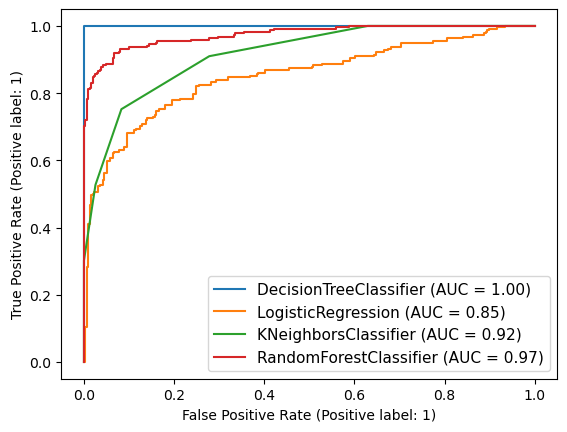

In [145]:
disp =plot_roc_curve(dtc,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_) # ax_  = Axes with confusion matrix

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()

## Testing

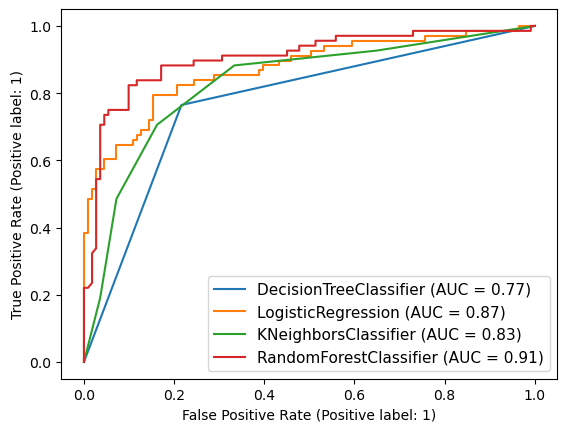

In [146]:
disp =plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_) # ax_  = Axes with confusion matrix

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()